## Data Augmentation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

First we will download the images dataset from google website. the file is in .tgz format.

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [6]:
data_dir

'.\\datasets\\flower_photos'

tf.keras.utils.get_file() will download the dataset and store it in a folder 'flower_data' with the url in variable dataset_url and unzip it. The path of the directory in saved in data_dir.

In [8]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

pathlib library is useful in managing paths, so we will convert data_dir into windows path

In [9]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

glob function will search for all files with extension .jpg and put them in a list.

In [10]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [12]:
roses=list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

PIL model is used to show images in python.

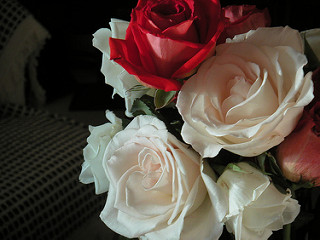

In [14]:
PIL.Image.open(str(roses[1]))

Now we want to create a dictionary of each kind of flowers and the paths of each category.

In [31]:
flower_images_dict={
    'daisy': list(data_dir.glob('daisy/*.jpg')),
    'dandelion': list(data_dir.glob('dandelion/*.jpg')),
    'roses': list(data_dir.glob('roses/*.jpg')),
    'sunflowers': list(data_dir.glob('sunflowers/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg'))
}

In [32]:
flower_images_dict['tulips']

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('datasets/flower_photos/tulips/110147301_ad921e2828.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112334842_3ecf7585dd.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112428665_d8f3632f36_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips

In [33]:
flower_labels_dict={
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4,
}

CV2 model has a function that read images as a matrix.

In [34]:
img=cv2.imread(str(flower_images_dict['roses'][5]))
img.shape

(276, 320, 3)

here we have the image with size 267 X 320 in three channels RGB.

CV2 also has a function that resize images because our images are not the same size.

In [25]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

We resized the image to 180 X 180 size.

We iterate through the flower_images_dict and for each image, we will read it using cv2 imread function then resize it. After that we append images in X (dependent features) and the labels of the images in y using flower_labels_dict.

In [40]:
X = [] 
y = []
for flower_name, path in flower_images_dict.items():
    for pth in path:
        img=cv2.imread(str(pth))
        img_resized = cv2.resize(img,(180,180))
        X.append(img_resized)
        y.append(flower_labels_dict[flower_name])

In [48]:
X=np.array(X)
Y=np.array(y)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

After that we split our data to train and test. Note that the default value for the split ratio is 0.75 to 0.25

In [50]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255


## Building CNN 

Now our dataset is ready to be trained in a CNN. Note that padding has two options, `"valid"` means no padding. `"same"` results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

Here we have 3 x convolutional layers each with 16,32,64 filters respectively and with size 3X3.

After convolutional layers and Pooling layers, we falttern the data and apply a dense network for classification.

In [56]:
num_classes = 5
y_train=np.array(y_train)
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 134s 2s/step - loss: 1.6912 - accuracy: 0.2956
Epoch 2/10
86/86 [==============================] - 109s 1s/step - loss: 1.0496 - accuracy: 0.5963
Epoch 3/10
86/86 [==============================] - 104s 1s/step - loss: 0.8926 - accuracy: 0.6661
Epoch 4/10
86/86 [==============================] - 107s 1s/step - loss: 0.6593 - accuracy: 0.7584
Epoch 5/10
86/86 [==============================] - 109s 1s/step - loss: 0.5220 - accuracy: 0.8148
Epoch 6/10
86/86 [==============================] - 111s 1s/step - loss: 0.3306 - accuracy: 0.8816
Epoch 7/10
86/86 [==============================] - 119s 1s/step - loss: 0.1958 - accuracy: 0.9386
Epoch 8/10
86/86 [==============================] - 113s 1s/step - loss: 0.1335 - accuracy: 0.9655
Epoch 9/10
86/86 [==============================] - 111s 1s/step - loss: 0.0635 - accuracy: 0.9850
Epoch 10/10
86/86 [==============================] - 131s 2s/step - loss: 0.0306 - accuracy: 0.9955


In [57]:
y_test=np.array(y_test)
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 344ms/step - loss: 2.1803 - accuracy: 0.6068


[2.1802849769592285, 0.6067538261413574]

Here we see that the accuracy with training data is 99% while the accuracy with test data is 60% which means that it is over-fitting condition.

Data Augmentition will help in overcoming over-fitting problem in CNN by generating more photoswith rotating and zooming to get more photos as dataset.

## Data Augmentation

From keras, there are many operations that can be done like random zooming, rotation and other operations.

We will try a random zooming layer and see how the image will transform.

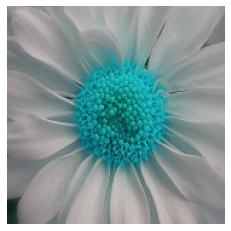

In [58]:
#Original photo
plt.axis('off')
plt.imshow(X[0])

We define a function for data augmentation that makes random zooming then use X as input for the function and get the first element and convert it to numpy arraay and make the type "uint8"

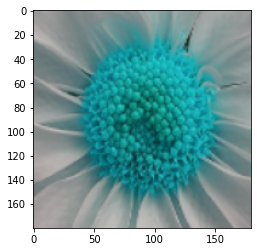

In [59]:
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomZoom(0.9)])
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

We see that the image zoomed with scale 0.9.

Now we will apply multiple data augmntation layers to our dataset and train the model again.

In [61]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [62]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 200s 2s/step - loss: 1.6291 - accuracy: 0.3452
Epoch 2/10
86/86 [==============================] - 173s 2s/step - loss: 1.0775 - accuracy: 0.5728
Epoch 3/10
86/86 [==============================] - 185s 2s/step - loss: 1.0039 - accuracy: 0.6079
Epoch 4/10
86/86 [==============================] - 189s 2s/step - loss: 0.9316 - accuracy: 0.6259
Epoch 5/10
86/86 [==============================] - 145s 2s/step - loss: 0.8410 - accuracy: 0.6574
Epoch 6/10
86/86 [==============================] - 142s 2s/step - loss: 0.8655 - accuracy: 0.6647
Epoch 7/10
86/86 [==============================] - 145s 2s/step - loss: 0.7739 - accuracy: 0.7079
Epoch 8/10
86/86 [==============================] - 149s 2s/step - loss: 0.7134 - accuracy: 0.7253
Epoch 9/10
86/86 [==============================] - 133s 2s/step - loss: 0.6649 - accuracy: 0.7480
Epoch 10/10
86/86 [==============================] - 130s 2s/step - loss: 0.6963 - accuracy: 0.7241


In [64]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 11s 370ms/step - loss: 0.7722 - accuracy: 0.6906


[0.7721591591835022, 0.6906318068504333]

#### After applying data augmentation we see that accuracy improved and it's near to the accuracy of training which means that we don't have an over-fitting problem.